In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

SMALL ANALYSIS OF STOCKS DATA

In [2]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="10Y")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-03 00:00:00-04:00,35.675615,35.743716,35.377681,35.581978,15969300,0.0,0.0
2014-07-07 00:00:00-04:00,35.539421,35.854380,35.505371,35.743721,21952400,0.0,0.0
2014-07-08 00:00:00-04:00,35.641553,35.752216,35.420232,35.564941,31218200,0.0,0.0
2014-07-09 00:00:00-04:00,35.735204,35.743718,35.352144,35.471317,18445900,0.0,0.0
2014-07-10 00:00:00-04:00,35.215926,35.752210,34.943528,35.488323,21854700,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-26 00:00:00-04:00,449.000000,453.600006,448.190002,452.160004,16507000,0.0,0.0
2024-06-27 00:00:00-04:00,452.179993,456.170013,451.769989,452.850006,14806300,0.0,0.0
2024-06-28 00:00:00-04:00,453.070007,455.380005,446.410004,446.950012,28362300,0.0,0.0


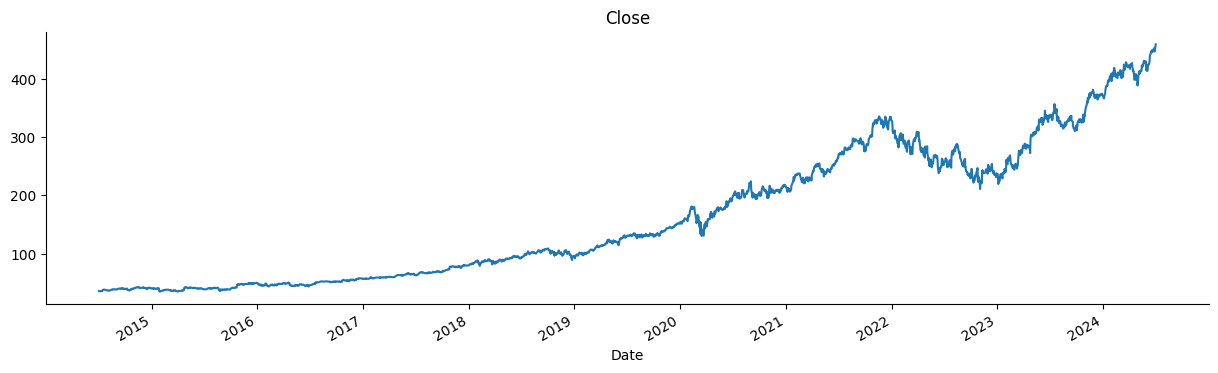

In [3]:
from matplotlib import pyplot as plt
hist['Close'].plot(kind='line', figsize=(15, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

STOCKS CHOSEN FOR TRAINING - MICROSOFT,NVIDIA,APPLE

In [4]:
stonks = [
    "MSFT",
    "NVDA",
    "AAPL"
]
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period="5y")
    hists[s] = history

for stock in stonks:
    temp_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

FIRST MAIN TASK

Web scrapping stock data via selenium

In [5]:
!pip install selenium


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!apt-get update
!apt-get install chromium chromium-driver

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [8]:
titles = []
dates = []

In [9]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = web_driver()


driver.get("https://www.ft.com/search?q=microsoft&sort=relevance&isFirstView=true&contentType=article&expandRefinements=true")
time.sleep(2)

articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
for article in articles:
    # Find title and date elements within each article
    title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
    date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")

    # Extract text from title and date elements
    title = title_element.text
    date = date_element.text

    # Append title and date to respective lists
    titles.append(title)
    dates.append(date)
# time.sleep(3)
# driver.quit()


driver.get("https://www.ft.com/search?q=microsoft&page=2&contentType=article&sort=relevance&expandRefinements=true&isFirstView=false")
time.sleep(2)
articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
for article in articles:
    # Find title and date elements within each article
    title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
    date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")

    # Extract text from title and date elements
    title = title_element.text
    date = date_element.text

    # Append title and date to respective lists
    titles.append(title)
    dates.append(date)





pagect = 3

while pagect < 800:
    driver.get("https://www.ft.com/search?q=microsoft&page=" +str(pagect) + "&contentType=article&sort=relevance&expandRefinements=true&isFirstView=false")
    time.sleep(2)

    articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
    for article in articles:

        title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
        date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")


        title = title_element.text
        date = date_element.text
        print("Data available")

        titles.append(title)
        dates.append(date)

    print("Page Ends")
    pagect+= 1



Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Page Ends
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Page Ends
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data available
Data 

In [ ]:
month_mapping = {
    'JANUARY': '01', 'FEBRUARY': '02', 'MARCH': '03', 'APRIL': '04',
    'MAY': '05', 'JUNE': '06', 'JULY': '07', 'AUGUST': '08',
    'SEPTEMBER': '09', 'OCTOBER': '10', 'NOVEMBER': '11', 'DECEMBER': '12'
}
def convert_date(date_str):
    parts = date_str.split()
    month = month_mapping[parts[0].upper()]
    day = parts[1][:-1]  # Remove the comma from the day part
    year = parts[2]
    return f"{year}-{month}-{day}"

In [ ]:
data = {'Date': dates,'Title': titles}
df = pd.DataFrame(data)
df.head()
df['Date'] = df['Date'].apply(convert_date)

# Convert the 'Date' column to pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame based on the 'Date' column in descending order
df_sorted = df.sort_values(by='Date', ascending=True)
df_sorted.to_csv('sorteddataframe',encoding='utf-8',index=False)
finaldf= pd.read_csv('sorteddataframe')
finaldf
df_concatenated = finaldf.groupby('Date')['Title'].agg(lambda x: ', '.join(x)).reset_index()
df_concatenated.head()

In [ ]:
hist['Label'] = (hist['Close'].shift(-1) - hist['Close'] > 0).astype(int)
hist

In [ ]:
# Create an empty list to store labels
labels = []
hist.index= hist.index.date
# Iterate over each row in the DataFrame
for index, row in df_concatenated.iterrows():
    # Get the date from the current row
    date_str = row['Date']
    date = pd.to_datetime(date_str).date()

    # Find the label based on the date
    if date in hist.index:
        label = hist.loc[date, 'Label']
    else:
        label = None

    # Append the label to the list
    labels.append(label)

# Assign the labels list to the 'Label' column in df_concatenated
df_concatenated['Label'] = labels

# Convert the 'Label' column to integer type
df_concatenated['Label'] = df_concatenated['Label'].astype('Int64')

# Display the DataFrame with the new 'Label' column
print(df_concatenated)


In [ ]:
df_concatenated = df_concatenated.dropna(subset=['Label'])
df_concatenated = df_concatenated.reset_index(drop=True)

print(df_concatenated)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
# Import NLTK libraries
stop_words = stopwords.words('english')
ps = PorterStemmer()

# Clean the text data
df_concatenated['text_cleaned'] = df_concatenated['Title'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in stop_words]))

In [ ]:
df_concatenated.head()

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Make sure to download Vader lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to each Title in the DataFrame
df_concatenated['compound'] = df_concatenated['text_cleaned'].apply(lambda x: sid.polarity_scores(x)['compound'])

print(df_concatenated)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (compound score)
X = df_concatenated[['compound']]

# Target variable (label)
y = df_concatenated['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=91)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=85)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_combination = None

# Features (compound score)
features = df_concatenated[['compound']]

for random_state_rf in range(80, 101):
    for random_state_split in range(80, 101):
        for test_size in np.arange(0.1, 0.21, 0.1):
            X_train, X_test, y_train, y_test = train_test_split(features, df_concatenated['Label'], test_size=test_size, random_state=random_state_split)
            rf_classifier = RandomForestClassifier(random_state=random_state_rf)
            rf_classifier.fit(X_train, y_train)
            y_pred = rf_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = (random_state_rf, random_state_split, test_size)

print("Best accuracy:", best_accuracy)
print("Best combination (random_state_rf, random_state_split, test_size):", best_combination)


NOW THE MODEL IS READY FOR USE 

In [ ]:
tesla = yf.Ticker("TSLA")
apdf = tesla.history(period="5y")
apdf

In [ ]:
#Visual Representation of closing price vs Date
plt.figure(figsize=(12,6))
plt.plot(apdf['Close'],label='Closing Price',c='r',alpha=1)
plt.title('Tesla(TSLA)')
plt.ylabel('Close Price($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [ ]:
driver= web_driver()
testtitles = []
testdates = []
driver.get("https://www.ft.com/search?q=TESLA&contentType=article&sort=relevance&expandRefinements=true&isFirstView=false")
time.sleep(2)

articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
for article in articles:
    # Find title and date elements within each article
    title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
    date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")

    # Extract text from title and date elements
    title = title_element.text
    date = date_element.text

    # Append title and date to respective lists
    testtitles.append(title)
    testdates.append(date)




driver.get("https://www.ft.com/search?q=TESLA&page=2&contentType=article&sort=relevance&expandRefinements=true&isFirstView=false")
time.sleep(2)
articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
for article in articles:
    # Find title and date elements within each article
    title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
    date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")

    # Extract text from title and date elements
    title = title_element.text
    date = date_element.text

    # Append title and date to respective lists
    testtitles.append(title)
    testdates.append(date)





pagect = 3

while pagect < 800:
    driver.get("https://www.ft.com/search?q=TESLA&page=" +str(pagect) + "&contentType=article&sort=relevance&expandRefinements=true&isFirstView=false")
    time.sleep(2)

    articles = driver.find_elements(By.CLASS_NAME, "o-teaser__content")
    for article in articles:
        # Find title and date elements within each article
        title_element = article.find_element(By.CLASS_NAME, "o-teaser__heading")
        date_element = article.find_element(By.CLASS_NAME, "o-teaser__timestamp")

        # Extract text from title and date elements
        title = title_element.text
        date = date_element.text
        print("Data available")
        # Append title and date to respective lists
        testtitles.append(title)
        testdates.append(date)

    print("Page Ends")
    pagect+= 1

In [ ]:
tesladata = {'Date': testdates,'Title': testtitles}
tesladf = pd.DataFrame(tesladata)

tesladf['Date'] = tesladf['Date'].apply(convert_date)

# Convert the 'Date' column to pandas datetime object
tesladf['Date'] = pd.to_datetime(tesladf['Date'])

# Sort the DataFrame based on the 'Date' column in descending order
tesladf_sorted = tesladf.sort_values(by='Date', ascending=True)

tesladf_sorted.to_csv('teslasorteddataframe',encoding='utf-8',index=False)
teslafinaldf= pd.read_csv('teslasorteddataframe')
tesladf_concatenated = teslafinaldf.groupby('Date')['Title'].agg(lambda x: ', '.join(x)).reset_index()
tesladf_concatenated

In [ ]:
tesladf_concatenated['text_cleaned'] = tesladf_concatenated['Title'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in stop_words]))

In [ ]:
tesladf_concatenated['compound'] = tesladf_concatenated['text_cleaned'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
tesladf_concatenated.head()

In [ ]:
features_tesla = tesladf_concatenated[['compound']]

# Predict labels using the trained Random Forest Classifier
predicted_labels = rf_classifier.predict(features_tesla)

# Assign predicted labels to the 'Label' column in the 'apple' DataFrame
tesladf_concatenated['Label'] = predicted_labels

# Display the modified DataFrame with predicted labels
print(tesladf_concatenated)

In [ ]:
# Create a new list to store the close prices
close_prices = []

# Loop through each date in appledf_concatenated
for date in tesladf_concatenated['Date']:
    # Check if the date exists in apdf
    if date in apdf.index:
        # If the date exists, append the close price to the close_prices list
        close_prices.append(apdf.loc[date, 'Close'])
    else:
        # If the date doesn't exist, append None to indicate missing data
        close_prices.append(None)

# Add the close prices to the appledf_concatenated DataFrame as a new column
tesladf_concatenated['Close'] = close_prices
# Remove rows with NaN values in the 'Close' column
tesladf_concatenated = tesladf_concatenated.dropna(subset=['Close'])

# Reset index after removing rows
tesladf_concatenated = tesladf_concatenated.reset_index(drop=True)
# Display the DataFrame with the close prices added
print(tesladf_concatenated)

IMPLEMENTING THE STRATEGY

In [ ]:
def Strategy(data, investment): # Pass investment as an argument
    position = False
    sell_price = []
    buy_price = []
    trade = []
    buy_dates = []  # List to store dates of buy signals
    sell_dates = []  # List to store dates of sell signals

    for i in range(len(data)):

        if data['Label'][i] == 0 and position == False:
            position = True
            number = int(investment / data['Close'][i]) # Now investment is accessible
            buy_price.append(data['Close'][i])

            c = data['Close'][i]
            buy_dates.append(data['Date'][i])  # Store the date of buy signal

        elif data['Label'][i] == 1 and position == True:
            position = False
            sell_price.append(data['Close'][i])

            trade.append((data['Close'][i] - c) * number)
            sell_dates.append(data['Date'][i])  # Store the date of sell signal

        else:
            pass

    return buy_price, sell_price, trade, buy_dates, sell_dates

investment = 10000  # Adjust your investment amount here

# Pass investment to the Strategy function
buy_prices, sell_prices, trades, buy_dates, sell_dates = Strategy(tesladf_concatenated, investment)

# Convert sell_dates to datetime objects
sell_dates = pd.to_datetime(sell_dates)
buy_dates = pd.to_datetime(buy_dates)

print("Length of sell_prices:", len(sell_prices))
print("Length of sell_dates:", len(sell_dates))
print("Length of buy_prices:", len(buy_prices))
print("Length of buy_dates:", len(buy_dates))

In [ ]:
#calculate number of wins
wins=[]
for i in range(len(trades)):
    if(trades[i]>=0):
        wins.append(trades[i])
wins

In [ ]:
#calculate number of losses
losses=[]
for i in range(len(trades)):
    if(trades[i]<=0):
        losses.append(trades[i])
losses

In [ ]:
#No. of Profitable Trades
number_profit=0
for i in range(0,len(trades)):
    if trades[i]>0:
       number_profit+=1
number_profit

In [ ]:
#Number of trades in which loss occurs
number_losses=0
for i in range(0,len(trades)):
    if trades[i]<0:
       number_losses+=1
number_losses

In [ ]:
#Total profits
pft=0
for i in range(0,len(trades)):
    if trades[i]>0:
       pft+=trades[i]
pft

In [ ]:
#Total Losses
lss=0
for i in range(0,len(trades)):
    if trades[i]<0:
       lss+=trades[i]
lss

In [ ]:
#Simple Annualised return
final_return=sum(trades)
annulised_return = (pft+lss)*100/(investment*10)
annulised_return

In [ ]:
#Final Portfolio Return
portfolio_return=(final_return)*100/investment
print("The return on investment is: ",portfolio_return,"%")

In [ ]:
#Sharpe Ratio
import statistics
sharpe_ratio = (statistics.mean(trades) - 1.69) / statistics.stdev(trades)
sharpe_ratio

In [ ]:
#Calculate Portfolio value
Portfolio_value=[]
value=0
for i in range(len(trades)):
    value+=trades[i]
    Portfolio_value.append(value+investment)
len(Portfolio_value)
#To include portfolio value when the final position is close
# You need to define 'position' and assign it a boolean value (True or False) based on whether the final position is closed
position = True # Or False, depending on your situation
if position==True:
    Portfolio_value.append(value+investment)

In [ ]:
#Plot of Portfolio Returns
plt.figure(figsize=(12,6))
plt.title('Portfolio Value')
plt.plot(Portfolio_value,c='b',alpha=0.5)
plt.ylabel('Current Value Of Portfolio($)')
plt.xlabel('Date')
plt.show()

THE END